# Format or Customize The Charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

#load dataset
df = pd.read_csv('C:/Users/HP/Desktop/Python_Data_Project/datasets/data_jobs.csv')

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x)
    if isinstance(x, str)
    else x
)

In [2]:
job_title = 'Data Analyst'
df_da = df[df['job_title_short'] == job_title].copy()
df_da_exploded = df_da.explode('job_skills')
df_da_exploded['job_posted_month'] = df_da_exploded['job_posted_date'].dt.strftime('%b')
df_da_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",Mar
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar


In [3]:
df_pivot = df_da_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size',fill_value=0)
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Dec,144,10,274,28,0,13,0,8,11,9,...,6,139,8,786,3,5,0,0,2,37
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18


In [4]:
df_pivot.reset_index(inplace=True)
df_pivot['month_no'] = pd.to_datetime(df_pivot['job_posted_month'], format='%b').dt.month
df_pivot.sort_values(by='month_no', inplace=True)
df_pivot.set_index('job_posted_month', inplace=True)
df_pivot.drop(columns='month_no', inplace=True)
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [5]:
top_skills = df_pivot.sum().sort_values(ascending=False).head(5).index.to_list()
top_skills

['sql', 'excel', 'python', 'tableau', 'power bi']

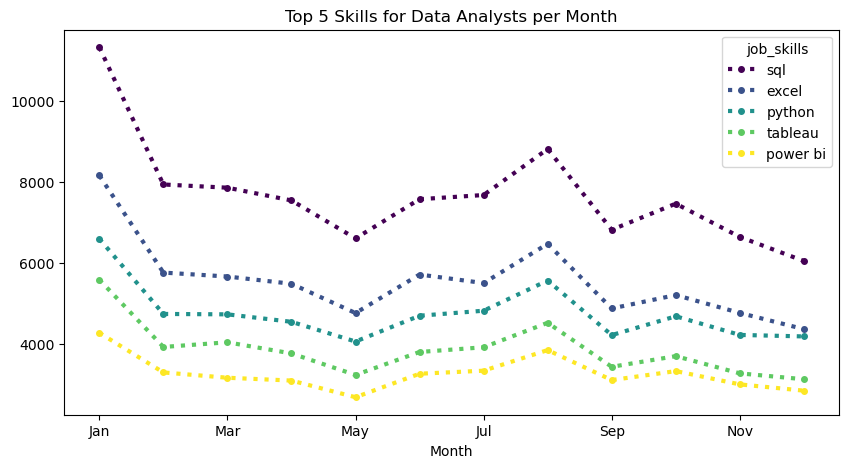

In [6]:
df_pivot[top_skills].plot(
    kind='line',
    linestyle=':',
    linewidth=3,
    colormap='viridis',
    marker='o',
    markersize=4,
    figsize=(10,5)
    )
plt.title(f'Top 5 Skills for {job_title}s per Month')
plt.xlabel('Month')
plt.show()

### Scatter Cuztomize

In [7]:
df_s = df.copy()
df_s_da = df_s[df_s['job_title_short'] == 'Data Analyst']
df_sda_exploded = df_s_da.explode('job_skills')
df_new = df_sda_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')

)
df_new = df_new.sort_values(by='skill_count', ascending=False).head(20)
df_new

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


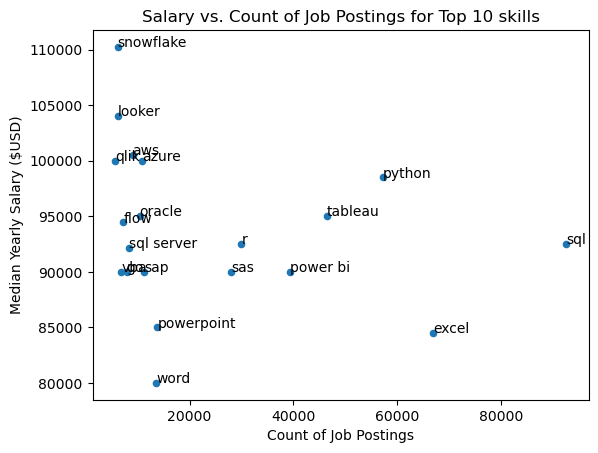

In [8]:
df_new.plot(
    kind='scatter', x='skill_count', y='median_salary',
    
    )
plt.title('Salary vs. Count of Job Postings for Top 10 skills')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')

for i, col in enumerate(df_new.index):
    plt.text(df_new['skill_count'].iloc[i], df_new['median_salary'].iloc[i], df_new.index[i])

plt.show()

### Use adjustText Library to cuztomize scatter plot

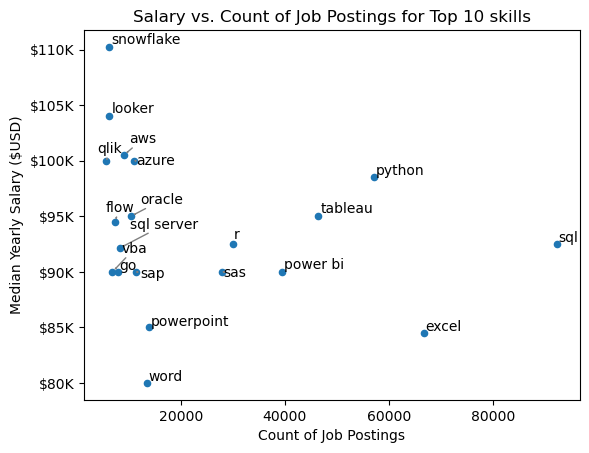

In [22]:
from adjustText import adjust_text

df_new.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, col in enumerate(df_new.index):
    texts.append(plt.text(df_new['skill_count'].iloc[i], df_new['median_salary'].iloc[i], col))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))
plt.title('Salary vs. Count of Job Postings for Top 10 skills')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.show()

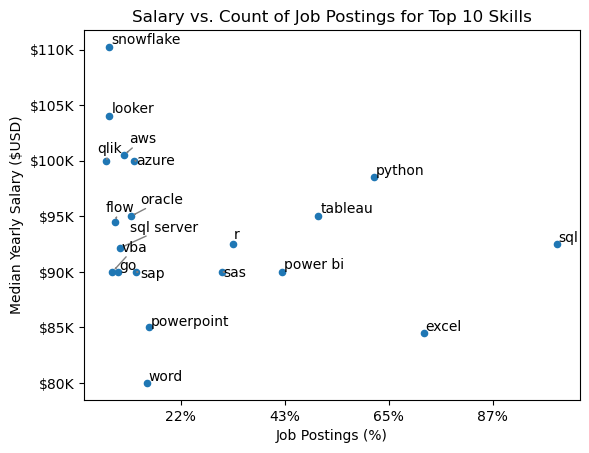

In [23]:
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text
import matplotlib.pyplot as plt

# Plot
df_new.plot(kind='scatter', x='skill_count', y='median_salary')

# Add text labels to each dot
texts = []
for i, col in enumerate(df_new.index):
    texts.append(plt.text(df_new['skill_count'].iloc[i], df_new['median_salary'].iloc[i], col))

# Get current axis
ax = plt.gca()

# Format Y-axis: salary in $K
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Format X-axis: percent
ax.xaxis.set_major_formatter(PercentFormatter(xmax=df_new['skill_count'].max()))

# Adjust labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

# Titles and labels
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Job Postings (%)')

plt.show()
